# NetworkX и PyGeometric

В этом ноутбуке мы посмотрим две полезные библиотеки [NetworkX](https://networkx.org/documentation/stable/) и [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).


# NetworkX
NetworkX — один из наиболее часто используемых пакетов Python для создания, изменения и анализа графов.

Основные части этого туториала адаптированы из https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

In [22]:
import networkx as nx
import pandas as pd
import numpy as np
from os.path import join as pjoin

## Graph
NetworkX предоставляет несколько классов для хранения различных типов графов, таких как ориентированный и неориентированный граф. Он также предоставляет классы для создания мультиграфов (как направленных, так и ненаправленных).

Для получения дополнительной информации см. [Типы графиков NetworkX](https://networkx.org/documentation/stable/reference/classes/index.html).

In [2]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node
Узлы (с атрибутами) можно легко добавлять в графики NetworkX.

In [3]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

G.add_node(1, feature=14, label=1)
G.add_node(2, feature=5, label=0)

node_1_attr = G.nodes[1]
print("Node 1 has the attributes {}".format(node_1_attr))


node_2_attr = G.nodes[2]
print("Node 2 has the attributes {}".format(node_2_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}
Node 1 has the attributes {'feature': 14, 'label': 1}
Node 2 has the attributes {'feature': 5, 'label': 0}


In [4]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}, 1: {'feature': 14, 'label': 1}, 2: {'feature': 5, 'label': 0}})

In [5]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 3, "label": 1}),
  (2, {"feature": 4, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 3, 'label': 1})
(2, {'feature': 4, 'label': 2})
G has 3 nodes


In [6]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (3, {"feature": 3, "label": 1}),
  (4, {"feature": 4, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 3, 'label': 1})
(2, {'feature': 4, 'label': 2})
(3, {'feature': 3, 'label': 1})
(4, {'feature': 4, 'label': 2})
G has 5 nodes


## Edge

Подобно узлам, ребра (с атрибутами) также могут быть легко добавлены в графы NetworkX.

In [7]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
  (2, 3, {"weight": 0.9})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
    print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
(2, 3)
G has 4 edges


## Visualization

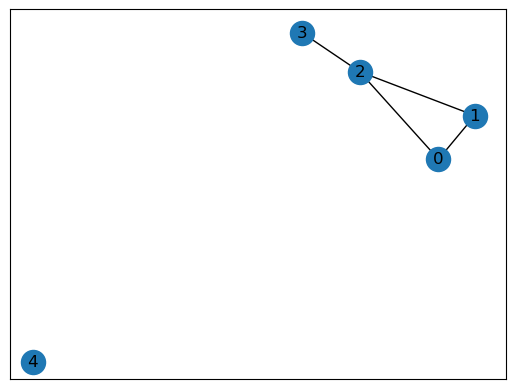

In [12]:
# Draw the graph

nx.draw_networkx(G, with_labels=True)

In [14]:
G.add_edge(3, 4, weight=0.5)

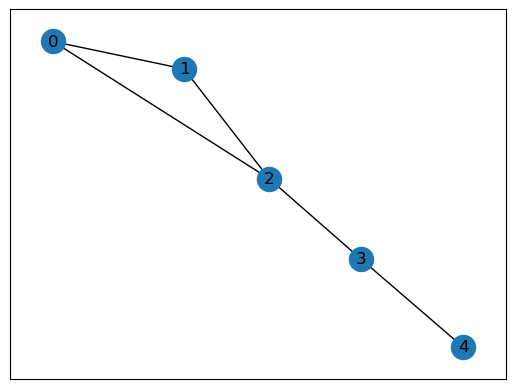

In [15]:
nx.draw_networkx(G, with_labels = True)

## Степень вершины и соседи

In [16]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [18]:
node_id = 0
# Degree of node 0
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 0
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 0 has degree 2
Node 0 has neighbor 1
Node 0 has neighbor 2


## Другие функции

NetworkX также предоставляет множество полезных методов для изучения графиков.

Вот пример получения [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) узлов.

In [19]:
nx.path_graph(num_nodes)

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

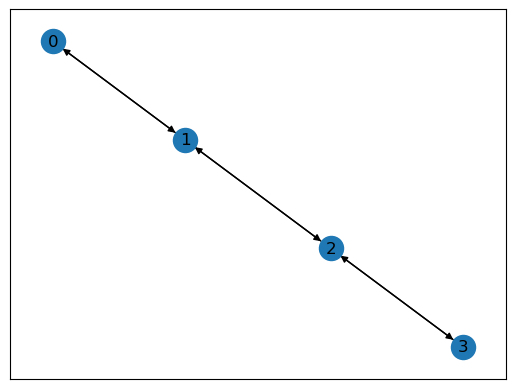

In [20]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw_networkx(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

Для практических заданий рассмотрим граф электронной почты корпорации Enron. Электронные письма, которыми обменивались несколько сотрудников Enron в период с ноября 1998 г. по июнь 2002 г., были обнародованы во время федерального расследования; дополнительные сведения о скандале с Enron см. на странице https://en.wikipedia.org/wiki/Enron_scandal. Полный набор данных доступен по адресу http://www.cs.cmu.edu/~enron/. Здесь мы будем использовать уменьшенную и проверенную версию корпуса электронной почты (например, с удаленным телом электронной почты), которую можно получить по адресу http://cis.jhu.edu/~parky/Enron/enron.html.


In [24]:
df_mails = pd.read_csv(pjoin('..', 'data','execs.email.linesnum.txt'), names=['time','from','to'], sep=' ')
df_employees = pd.read_csv(pjoin('..', 'data','employees.txt'), sep='\t', names=['mail', 'name and more'])


In [25]:
# compute the dates from the timestamp (in seconds from 1/1/1970)
df_mails['date'] = pd.to_datetime(df_mails.time, unit='s')
df_mails = df_mails[df_mails.date.dt.year>1980]

df_mails.head()

,time,from,to,date
174,910948020,114,169,1998-11-13 09:07:00
175,910948020,114,169,1998-11-13 09:07:00
176,911477940,114,123,1998-11-19 12:19:00
177,911477940,114,123,1998-11-19 12:19:00
178,911481840,114,123,1998-11-19 13:24:00


In [30]:
mails_exchanged = df_mails.groupby(['from', 'to']).count().reset_index()
mails_exchanged.rename(columns={'time':'weight'}, inplace=True)
mails_exchanged.drop('date', axis=1, inplace=True)
mails_exchanged.head()

,from,to,weight
0,0,9,23
1,0,20,4
2,0,48,2
3,0,91,2
4,0,104,1


In [32]:
from matplotlib import pyplot as plt

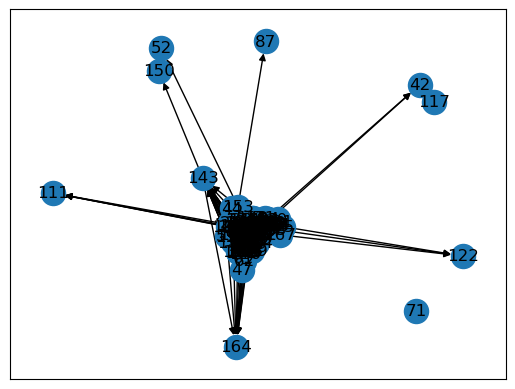

In [33]:
# pandas can be interfaced with networkx. 
G = nx.from_pandas_edgelist(
    mails_exchanged, 
    source='from', 
    target='to', 
    edge_attr='weight', 
    create_using=nx.DiGraph
)

# remove self loops
G.remove_edges_from(nx.selfloop_edges(G))

nx.draw_networkx(G)
plt.show()

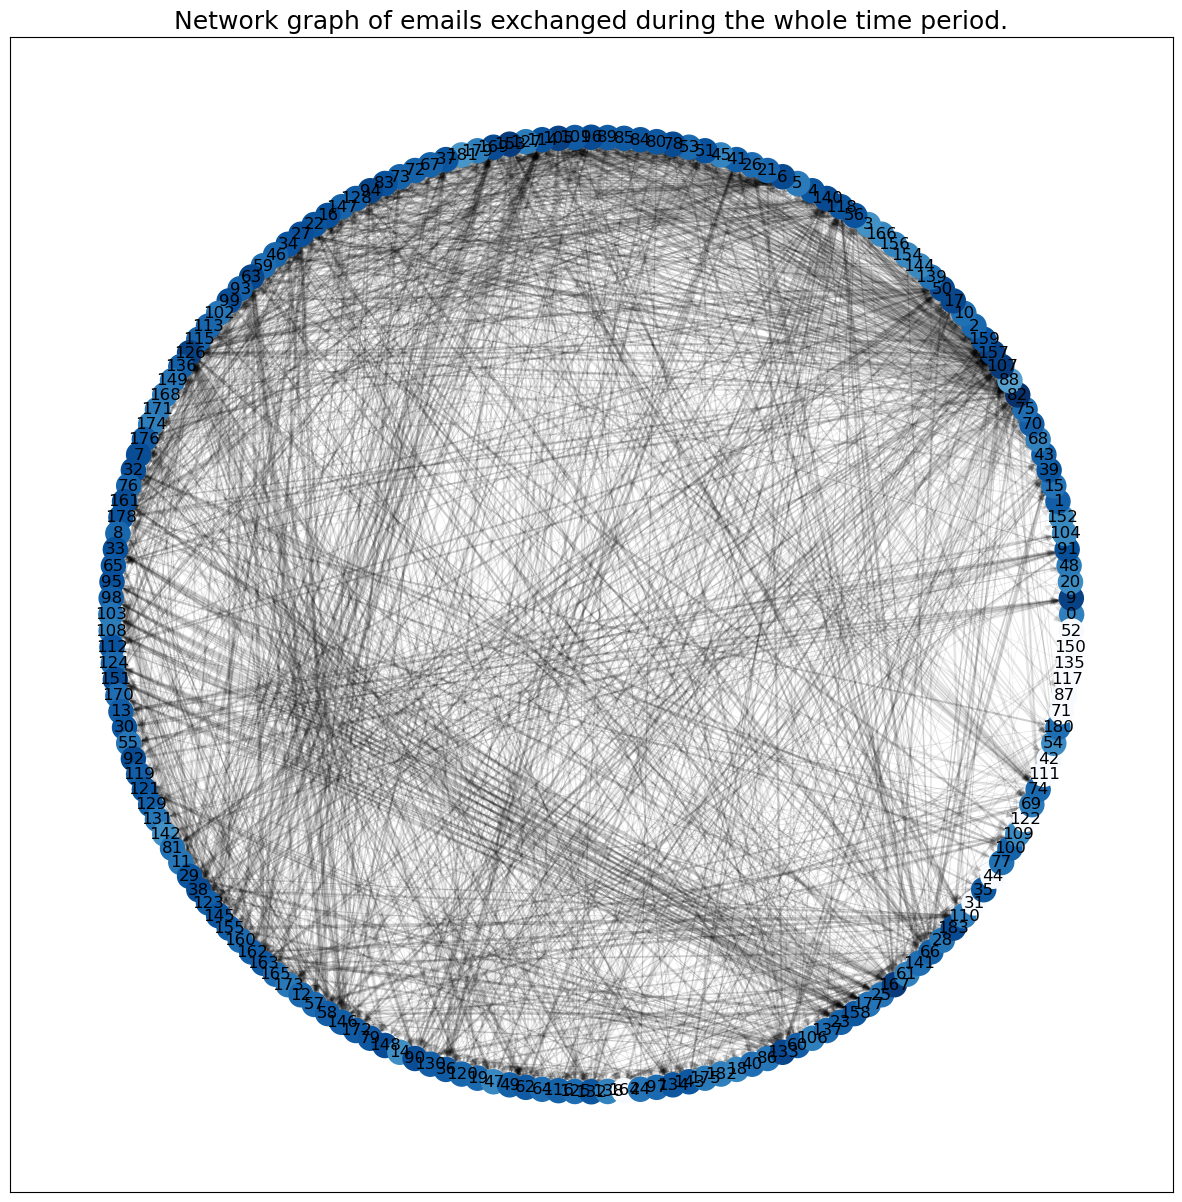

In [34]:
# Edge width is proportional to the number of emails exchanged (log scale) 
# Vertex color intensity is proportional to its betweeness centrality (log scale)

positions = nx.circular_layout(G)
edges = G.edges()
weights = np.array([G[u][v]['weight'] for u,v in edges])

between_dict = nx.betweenness_centrality(G)
between = np.array(list(between_dict.values()))

plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=positions, node_color=10*np.log(1+between/(np.min(between)+1e-9)), cmap='Blues')
nx.draw_networkx_edges(G, alpha=0.1, width=np.log10(weights+1), pos=positions)
nx.draw_networkx_labels(G, pos=positions, font_color='black')
plt.title('Network graph of emails exchanged during the whole time period.', fontsize=18)
plt.show()

In [36]:
import seaborn as sns

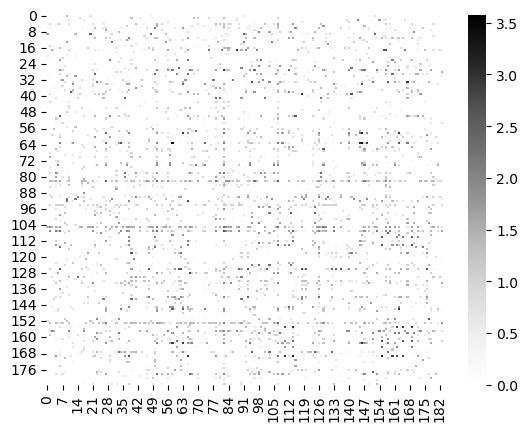

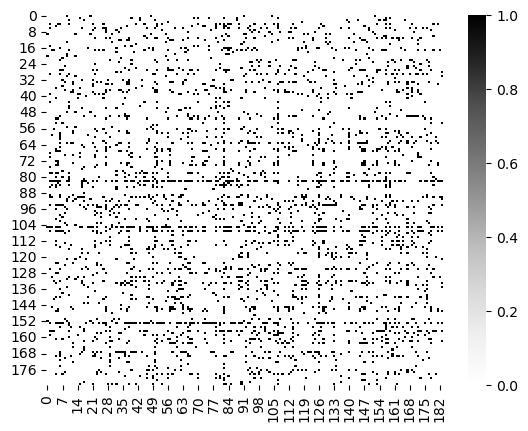

In [37]:
# in addition to interfacing with pandas, NetworkX can work with NumPy and matrices

# for instance, obtaining the adjacency matrix is as simple as this
G_np = nx.to_numpy_array(G,nodelist=range(G.number_of_nodes()))
# we plot it using seaborn
sns.heatmap(np.log10(G_np+1), cmap='Greys')
plt.show()


*Задание:* постройте тепловую карту так, чтобы получить только изображение матрицы смежности (есть ребро или нет) 

In [ ]:
# or we can exclusively focus on the connecitivity pattern...
sns.heatmap(G_np>0, cmap='Greys')
plt.show()


## Сетевой анализ

*Задание*: Используйте API-интерфейсы Networkx или NumPy для вычисления различных сводных статистических данных сетевого графа `G(V,E)`:

1. Количество направленных ребер (дуг) в сети, т. е. количество уникальных упорядоченных пар $(u,v)\in E$,
где $u,v\in V$.
2. Количество неориентированных ребер в сети, т. е. количество уникальных неупорядоченных пар $(u,v)\in E$,
где $u,v\in V$. (Это означает, что если хотя бы одно из $(u,v)\in E$ или $(v,u)\in E$ считается парой как одно неориентированное ребро.)
3. Количество взаимных дуг в сети, т. е. количество пар $(u,v)$, где $\{(u,v),(v,u)\}\subseteq E$
и $u,v\in V$. (Это означает, что если и $(u,v)\in E$, и $(v,u)\in E$, вы считаете пару взаимной дугой.)
4. Количество узлов с $d_v^{\text{in}}=0$ и список соответствующих имён сотрудников.
5. Количество узлов с $d_v^{\text{out}}=0$ и список соответствующих имён сотрудников.
6. Количество сотрудников, с которыми связались 30 и более сотрудников. Создайте новую визуализацию графа и: (i) раскрасьте эти узлы красным цветом; (ii) пометить эти узлы соответствующими именами сотрудников.
7. Количество сотрудников, связавшихся с 30 и более сотрудниками. Создайте новую визуализацию графа и: (i) раскрасьте эти узлы красным цветом; (ii) пометить эти узлы соответствующими именами сотрудников.
8. Гистограмма степеней вершин (отдельно $d_v^{\text{in}}$ и $d_v^{\text{out}}$). Например, вы можете использовать инструмент histplot в Seaborn.
9. Определите самого важного сотрудника компании, то есть вершину с максимальной центральностью

## Динамический (временной) анализ сети

До сих пор мы исследовали весь набор данных и игнорировали его временное измерение. Чтобы восполнить этот пробел, в этом разделе мы проведем простой динамический сетевой анализ, чтобы изучить, как граф меняется во времени.

In [38]:
# let's cluster emails per week, so we first check to which week a given email corresponds to and then we add it to df_mails
df_mails['week'] = df_mails.date.dt.to_period('W')
print(df_mails.head())

# per week aggregation. This generates a GroupBy object over which we can iterate, and contains all data for each week
grouped_week = df_mails.groupby('week')
# list that will contain the weekly network graphs
graphs = []
# list that will contain the weeeks themselves. Come be used to identify timestamps down the road. 
weeks = []

for week_id, mails_group in grouped_week:
    # we basically repeated what we did for the entire graph, but on a per week basis. 
    # we will be storing the weekly graphs in a list. Arguably not the most efficient approach, but the dataset is not that large

    # count number of emails between a pair of users this week
    mails_exchanged = mails_group.groupby(['from', 'to']).count().reset_index()
    # the columns have the same information, so abrbitrarily change one to "weight" which I will use to define edge weights
    mails_exchanged.rename(columns={'week':'weight'}, inplace=True)
    G = nx.from_pandas_edgelist(mails_exchanged, source='from', target='to', edge_attr='weight', create_using=nx.DiGraph)
    
    # remove self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    # add the new graph to the list
    graphs.append(G)
    weeks.append(week_id)
    


          time  from   to                date                   week
174  910948020   114  169 1998-11-13 09:07:00  1998-11-09/1998-11-15
175  910948020   114  169 1998-11-13 09:07:00  1998-11-09/1998-11-15
176  911477940   114  123 1998-11-19 12:19:00  1998-11-16/1998-11-22
177  911477940   114  123 1998-11-19 12:19:00  1998-11-16/1998-11-22
178  911481840   114  123 1998-11-19 13:24:00  1998-11-16/1998-11-22


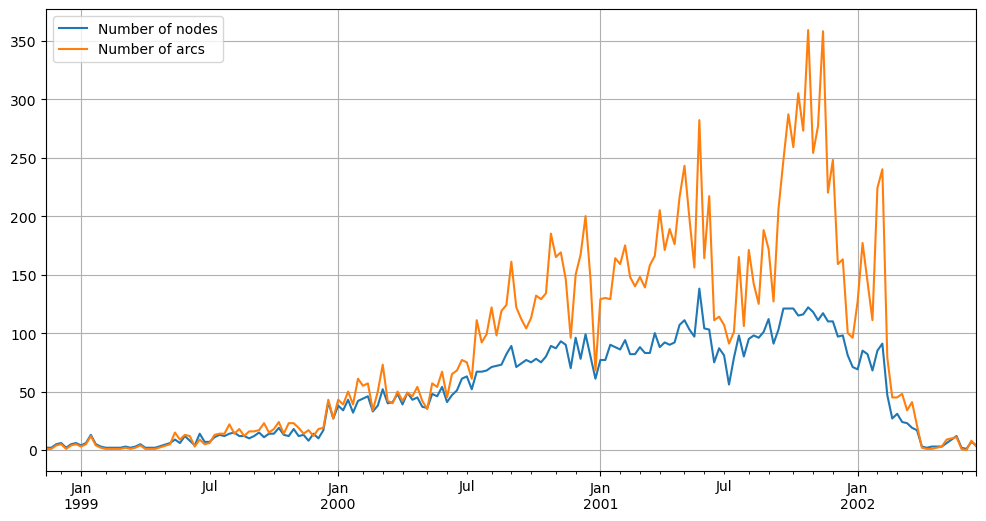

In [39]:
# let's examine the temporal evolution of some simple summary statistcs

num_nodes = [current_graph.number_of_nodes() for current_graph in graphs]
num_arcs = [current_graph.number_of_edges() for current_graph in graphs]
pd.DataFrame({'n_nodes':num_nodes, 'n_arcs':num_arcs}, index=weeks).plot(figsize=(12,6))
plt.grid()
plt.legend(['Number of nodes', 'Number of arcs'])
plt.show()


### Изменения в сетевом графе
Выберите две меры центральности узла по своему выбору (см., например, главу 4 книги Э. Колачика «Статистический анализ сетевых данных», [слайды лекции о центральности] (https://www.hajim.rochester.edu/ece/site/gmateos/ECE442/Slides/block_3_descriptive_analysis_properties_part_c.pdf) или [документацию NetworkX](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)) и укажите, кто был самым важным сотрудником Enron. каждую неделю в соответствии с каждым из этих показателей. Сравните ваши результаты с тем, что вы получили для «всего» графа (а именно сети, построенной ранее с использованием данных за весь временной горизонт).

# PyTorch Geometric

PyTorch Geometric (PyG) это библиотека расширений для PyTorch. Он предоставляет полезные примитивы для разработки моделей Graph Deep Learning, включая различные слои графовой нейронной сети и большое количество эталонных наборов данных.

Не беспокойтесь, если вы не понимаете некоторые концепции, такие как `GNCConv`, — мы рассмотрим их все чуть позже :)

Это руководство взято из https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI [Matthias Fey](https://rusty1s.github.io/#/ )

In [3]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.13.1


## Визуализация

In [21]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Введение
В последнее время глубокое обучение на графах стало одной из самых популярных областей исследований в сообществе глубокого обучения.
Здесь **Graph Neural Networks (GNNs)** нацелены на то, чтобы обобщить классические концепции глубокого обучения на нерегулярные структурированные данные (в отличие от изображений или текстов) и позволить нейронным сетям рассуждать об объектах и их отношениях.

В этом руководстве вы познакомитесь с некоторыми основными понятиями, касающимися глубокого обучения на графах с помощью нейронных сетей графов на основе **[библиотеки PyTorch Geometric (PyG)](https://github.com/rusty1s/pytorch_geometric)**.

Вслед за [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), давайте рассмотрим простой пример графовой структуры, хорошо известную [**сеть клубов карате Закари**]( https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Этот график описывает социальную сеть из 34 членов клуба карате и документирует связи между участниками, которые общались вне клуба. Здесь нас интересует обнаружение сообществ, возникающих в результате взаимодействия участников.

## Dataset

PyTorch Geometric обеспечивает легкий доступ к набору данных через пакет[`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets):

In [40]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


После инициализации набора данных [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) мы сначала можем проверить некоторые его свойства.
Например, мы видим, что этот набор данных содержит ровно один граф, и что каждому узлу в этом наборе данных назначен 34-мерный вектор признаков (который однозначно описывает членов клуба карате).
Кроме того, граф содержит 4 класса, которые представляют сообщество, к которому принадлежит каждый узел.

Давайте теперь посмотрим на базовый граф более подробно:

In [41]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 9.18
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [42]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Data

Каждый граф в PyTorch Geometric представлен объектом [`Data`] (https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data), который содержит всю информацию для описания его графового представления.
Мы можем посмотреть объект данных в любое время с помощью `print(data)`, чтобы получить краткую сводку о его атрибутах


In [43]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


Мы видим, что этот объект `data` содержит 4 атрибута:
(1) Атрибут `edge_index` содержит информацию о связности графа, т.е. кортеж индексов исходного и целевого узлов для каждого ребра.
PyG также ссылается на (2) признаки узлов как «x» (каждому из 34 узлов назначается 34-мерный вектор признаков) и (3) метки узлов как «y» (каждый из узел относится ровно к одному классу).
(4) Также существует дополнительный атрибут, называемый `train_mask`, который описывает, для каких узлов мы уже знаем их сообщества.
Всего нам известны только метки истинности 4 узлов (по одному для каждого сообщества), и задача состоит в том, чтобы вывести назначение сообщества для остальных узлов.

Объект `data` также предоставляет некоторые служебные функции для определения некоторых основных свойств лежащего в основе графа.
Например, мы можем легко сделать вывод, существуют ли в графе изолированные узлы (*т.е.* не существует ни одного ребра ни для одного узла), содержит ли граф петли (*т.е.*, $(v, v) \in \mathcal {E}$), или является ли граф неориентированным (*т.е.* для каждого ребра $(v, w) \in \mathcal{E}$ также существует ребро $(w, v) \in \mathcal{ Е}$).

## Edge Index

Далее мы  узнаем `edge_index` нашего графа:

In [44]:
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Напечатав `edge_index`, мы можем лучше понять, как PyG представляет связность графа внутри.
Мы можем видеть, что для каждого ребра `edge_index` содержит кортеж из двух индексов узлов, где первое значение описывает индекс узла исходного узла, а второе значение описывает индекс узла целевого узла ребра.

Это представление известно как **формат COO (формат координат)**, обычно используемый для представления разреженных матриц.
Вместо того, чтобы хранить информацию о смежности в плотном представлении $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG разреженно представляет графы, что означает хранение только тех координат/значений, для которых записи в $\mathbf{A}$ отличны от нуля.

Мы можем дополнительно визуализировать график, преобразовав его в формат библиотеки `networkx`, который реализует, помимо функций манипулирования графиком, мощные инструменты для визуализации:

In [46]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

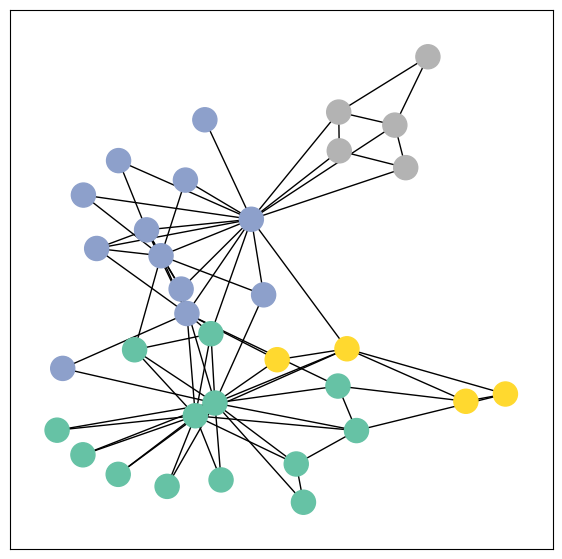

In [47]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Проверка свойств лапласиана графа
Эмпирически проверим некоторые свойства лапласиана графа. 

1. Вычислите матрицу лапласиана графа $\mathbf{L}$. Можно использовать, например, подходящую функцию из подпакета [`torch_geometric.utils`](https://pytorch-geometric.readthedocs.io/en/latest/modules/utils.html).
2. Убедитесь, что $\mathbf{L}$ имеет собственное значение 0, и проверьте, что вектор всех единиц $[1,1,\dots,1]^\top$ является соответствующим собственным вектором. Для этого может быть полезен подпакет [`torch.linalg`](https://pytorch.org/docs/stable/linalg.html).
3. Подтвердите, что $\mathbf{L}$ — симметричная положительно полуопределенная матрица.
4. Сформируйте матрицу $\tilde{\mathbf{B}}$, как описано в части 2 дополнительного упражнения ниже, и убедитесь, что $\mathbf{L}=\tilde{\mathbf{B}}\tilde{\mathbf {B}}^\top$. Рекомендуется использовать функцию [`networkx.incidence_matrix`](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.incidence_matrix.html).

## Первая графовая сеть (GNNs)
Пришло время реализовать нашу первую нейронную сеть Graph!

Для этого мы будем использовать один из самых простых операторов GNN, GCN ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG реализует этот слой через [`GNCConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GNCConv), который можно применить, передав представление функции узла `x` и представление связности графа COO `edge_index`.

### Каков вывод GNN?

Цель GNN состоит в том, чтобы взять входной граф $G = (\mathcal{V}, \mathcal{E})$, где каждый узел $v_i \in \mathcal{V}$ имеет входной вектор признаков $X_i^{ (0)}$. Мы хотим изучить функцию $f \to \mathcal{V} \times \mathcal{R}^d$, функцию, которая принимает узел и его вектор признаков, а также структуру графа и выводит _embedding_, вектор, представляющий этот узел способом, который полезен для нашей последующей задачи. После того, как мы сопоставили узлы и их начальные признаки с их выиученными эмбеддингами, мы можем использовать эти эмбеддинги для выполнения множества различных задач, включая регрессию/классификацию на уровне узла, на уровне ребра или на уровне графа.

Сделаем классификацию каждого узла в его сообществе.

Теперь мы готовы создать нашу первую графовую нейронную сеть, определив нашу сетевую архитектуру:

In [48]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

torch.manual_seed(1234)

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, 8)
        self.conv2 = GCNConv(8, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 8)
  (conv2): GCNConv(8, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)



Сначала мы определяем  три слоя графовой свертки. Каждый уровень соответствует агрегированию информации из 1-шагового соседства каждого узла (его непосредственных соседей), но когда мы составляем слои вместе, мы можем агрегировать информацию из 3-шагового соседства каждого узла (все узлы на расстоянии до 3 «скачков» друг от друга). ).

Кроме того, слои `GNCConv` уменьшают размерность узловых объектов до $2$, *т.е.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Каждый слой `GNCConv` дополнен нелинейностью [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh).

После этого применяем одно линейное преобразование ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn. Linear)) который действует как классификатор для сопоставления наших узлов с 1 из 4 классов/сообществ.

Мы возвращаем как выходные признаки классификатора, так и окончательные эмбеддинги узлов, созданные нашей GNN.
Мы приступаем к инициализации нашей окончательной модели с помощью `GCN()`, и печать нашей модели дает сводку всех ее используемых подмодулей.

Embedding shape: [34, 2]


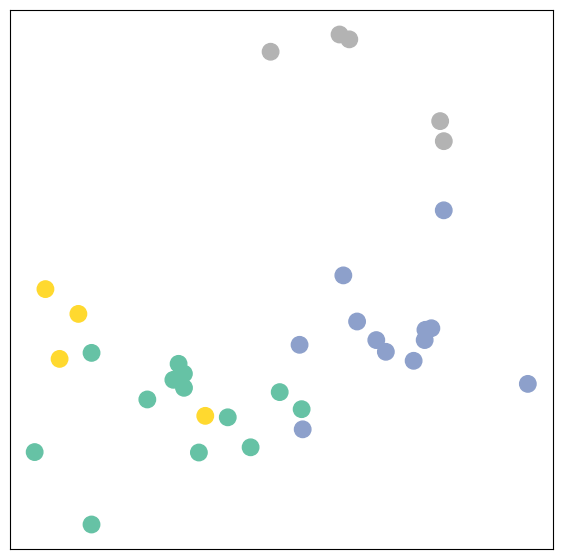

In [49]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Примечательно, что даже до обучения нашей модели модель создает вложение узлов, которое очень напоминает структуру сообщества графа.
Узлы одного цвета (сообщество) уже тесно сгруппированы в пространстве эмбеддингов, хотя веса нашей модели инициализируются совершенно случайным образом, и мы пока не проводили никакого обучения!
Это приводит к выводу, что GNN вносят сильное индуктивное смещение, приводя к аналогичным вложениям для узлов, которые находятся близко друг к другу во входном графе.

### Тренировка в сети клубов каратэ

Но можем ли мы сделать лучше? Давайте рассмотрим пример того, как обучить нашу сеть, основываясь на знании сообщества 4-х узлов в графе (по одному на каждое сообщество):

Поскольку все в нашей модели дифференцируемо и параметризовано, мы можем добавить несколько меток, обучить модель и посмотреть, как реагируют эмбеддинги.
Здесь мы используем полууправляемую или трансдуктивную процедуру обучения: мы просто тренируемся на одном узле для каждого класса, но нам разрешено использовать полные данные входного графа.

Обучение нашей модели очень похоже на любую другую модель PyTorch.
В дополнение к определению нашей сетевой архитектуры мы определяем функцию потерь (здесь [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) и инициализируем оптимизатор (здесь [`Адам`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
После этого мы выполняем несколько раундов оптимизации.

Обратите внимание, что наш сценарий обучения с полуучителем реализуется следующей строкой:
```
ошибка = критерий (out [data.train_mask], data.y [data.train_mask])
```
Пока мы вычисляем эмбеддинги для всех наших узлов, мы используем только обучающие узлы для вычисления потерь.
Здесь это реализовано путем фильтрации вывода классификатора «out» и меток достоверности «data.y», чтобы они содержали только узлы в «train_mask».

Давайте теперь начнем обучение и посмотрим, как наши эмбеддинги узлов развиваются с течением времени (лучше всего наблюдать при явном запуске кода):

<IPython.core.display.Javascript object>

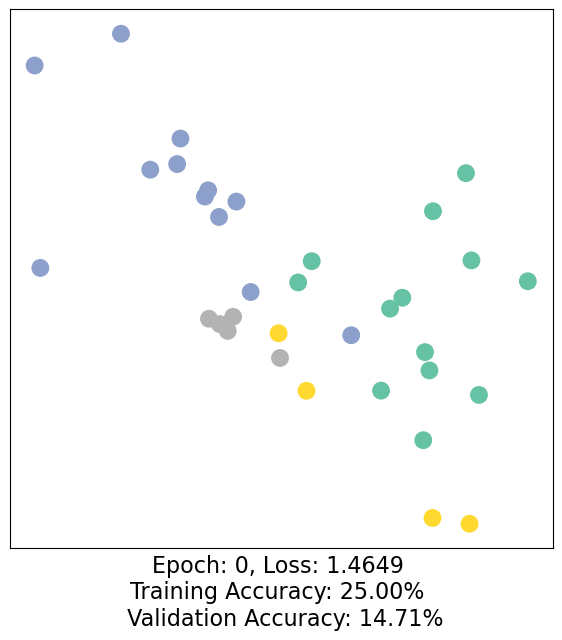

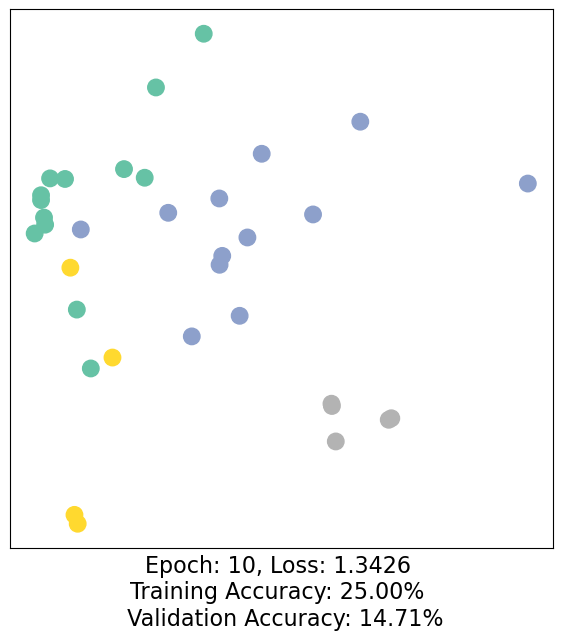

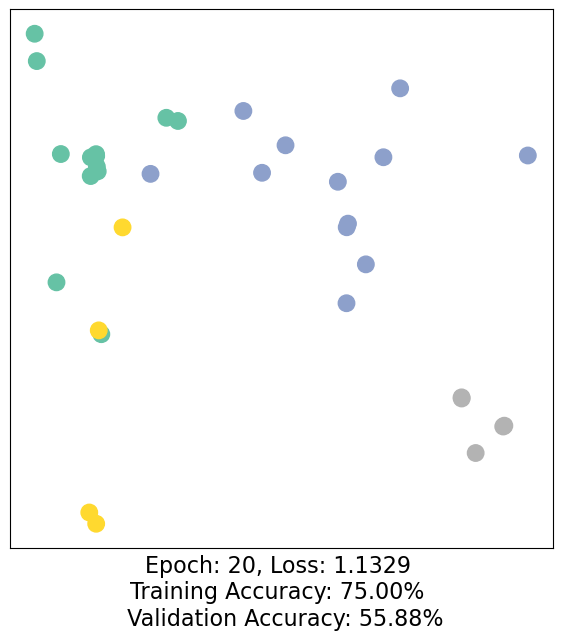

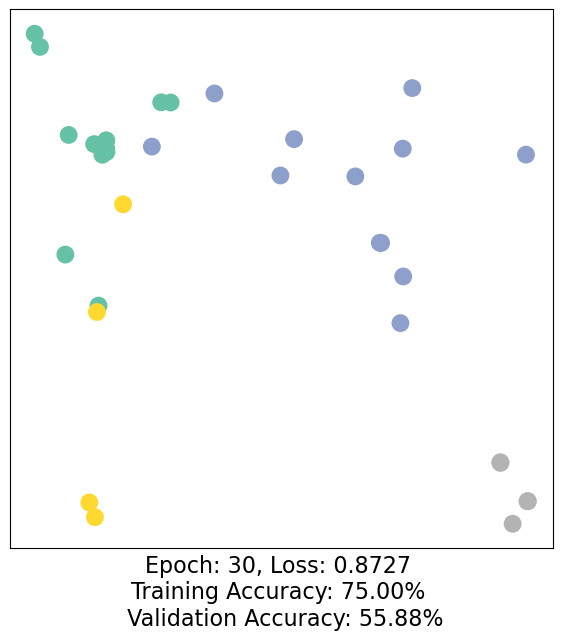

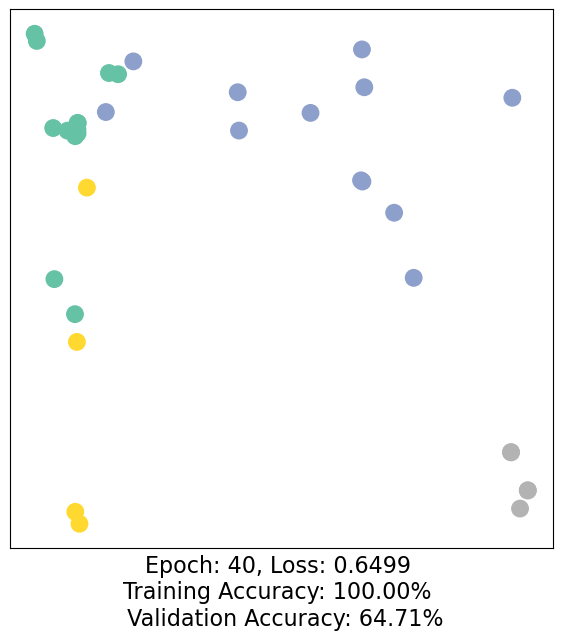

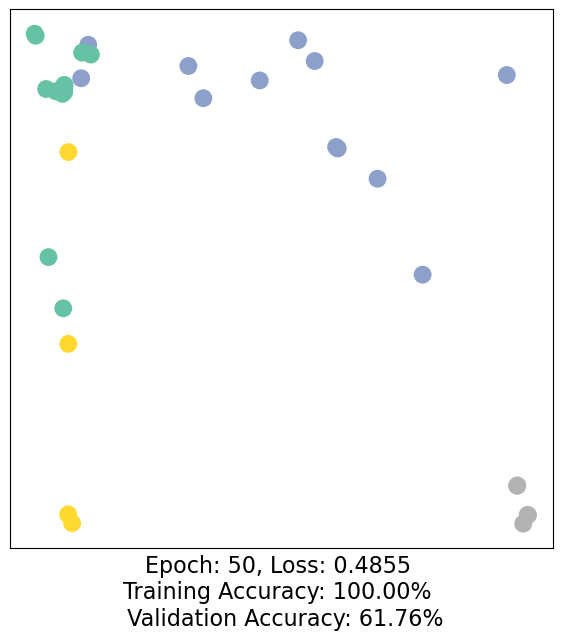

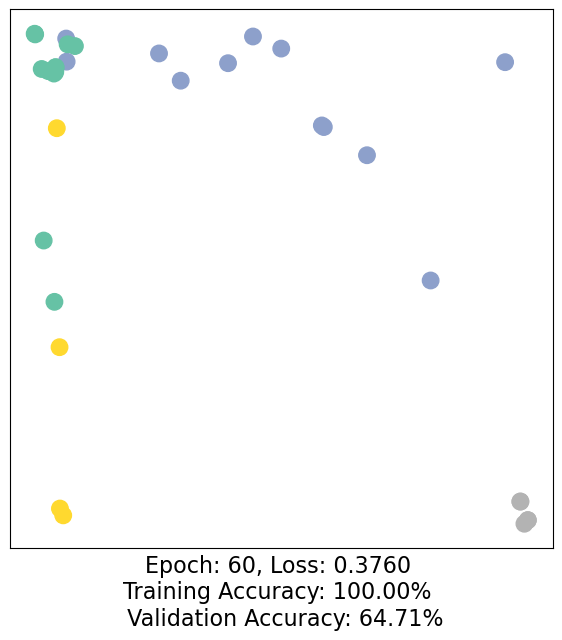

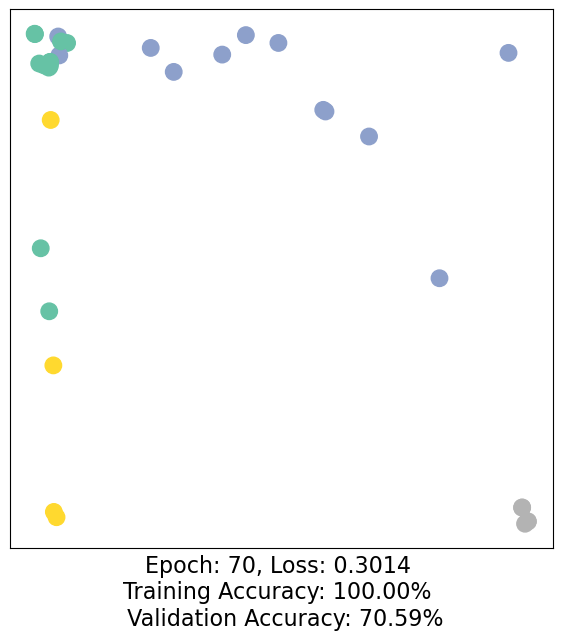

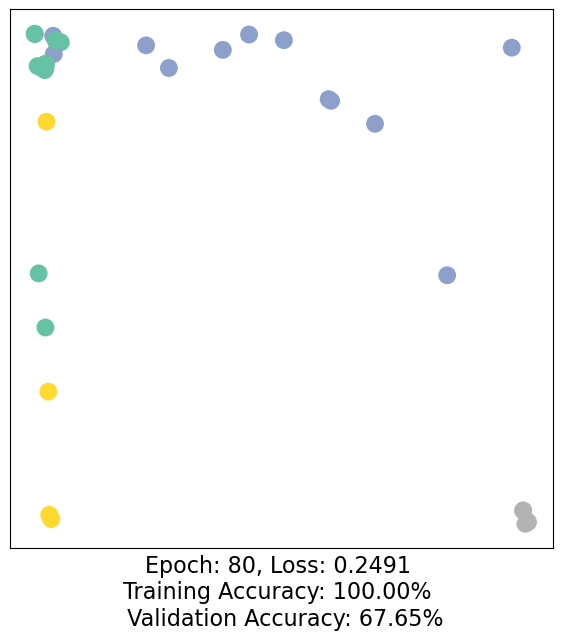

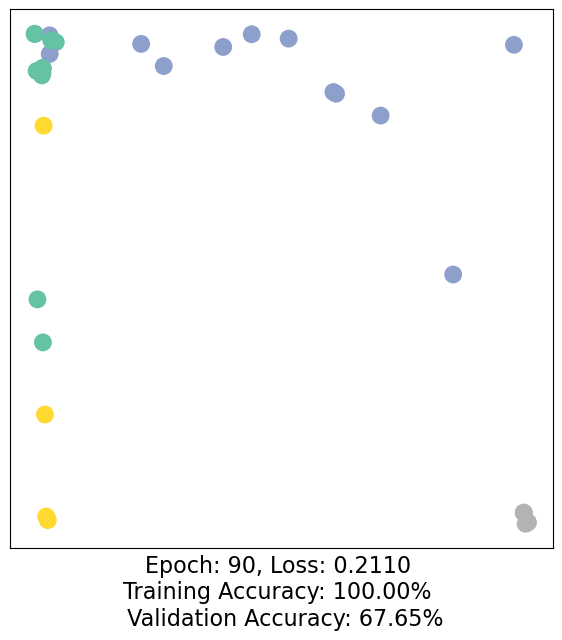

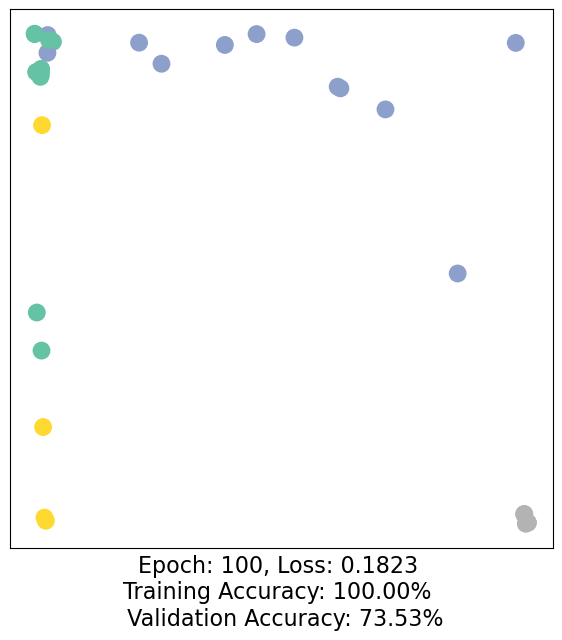

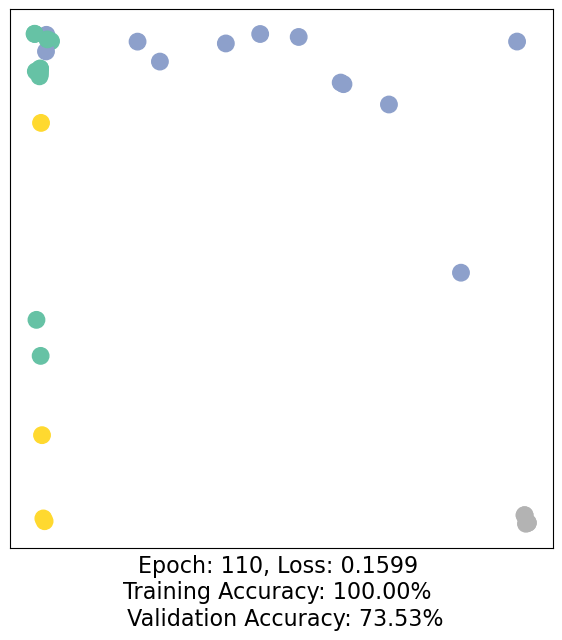

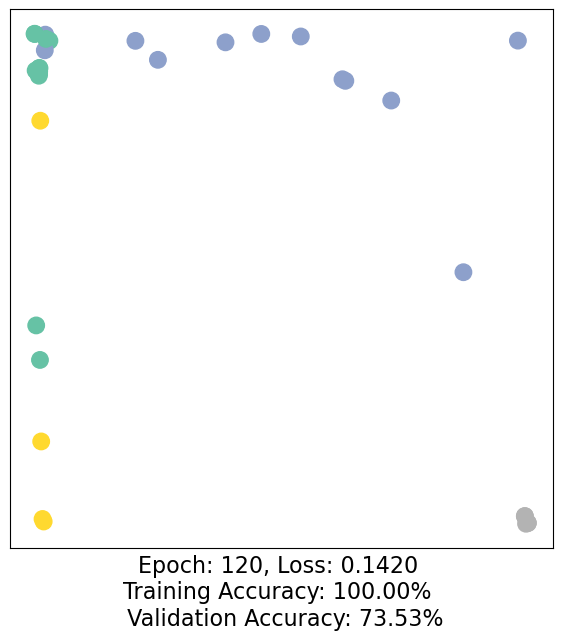

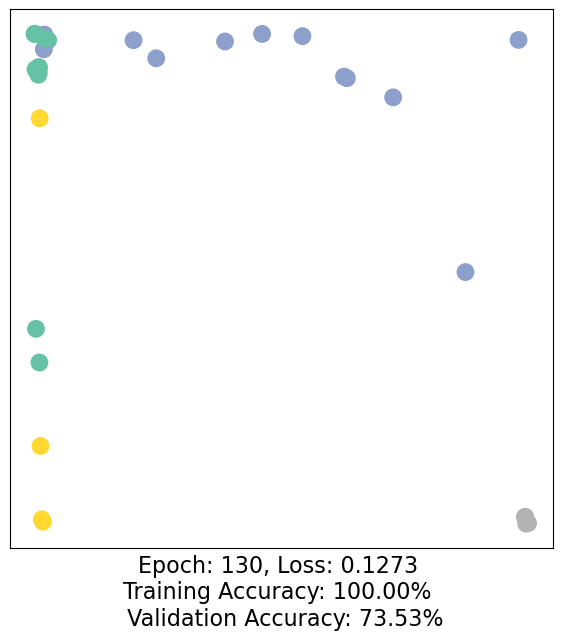

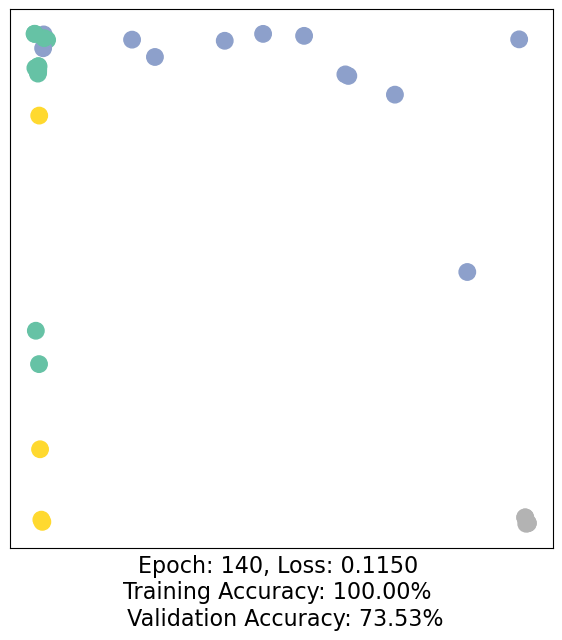

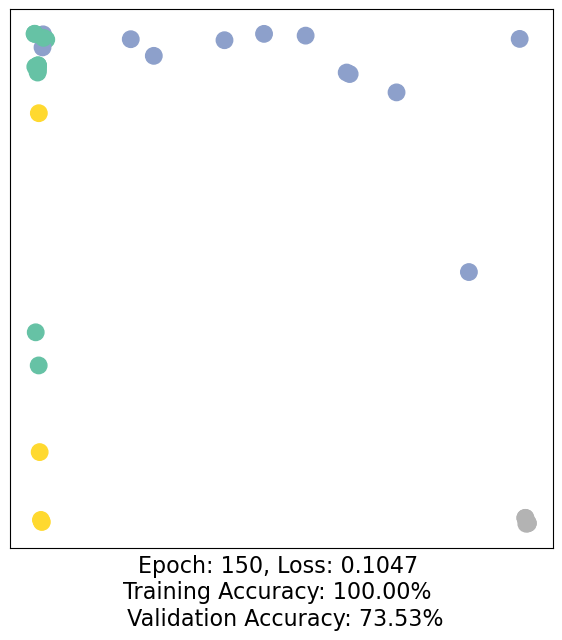

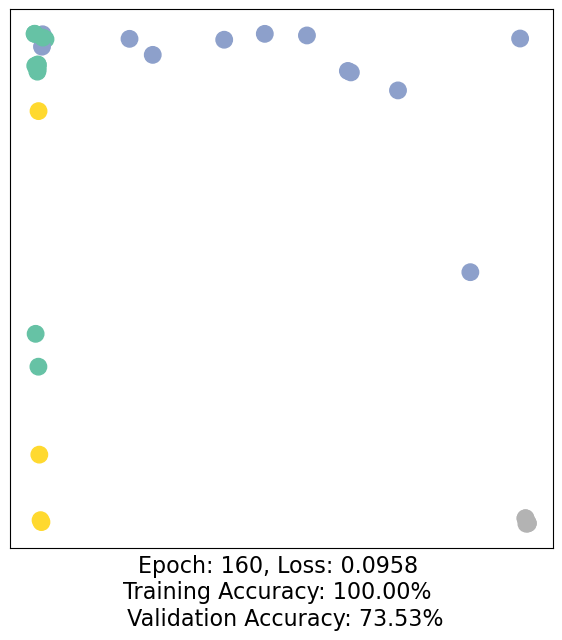

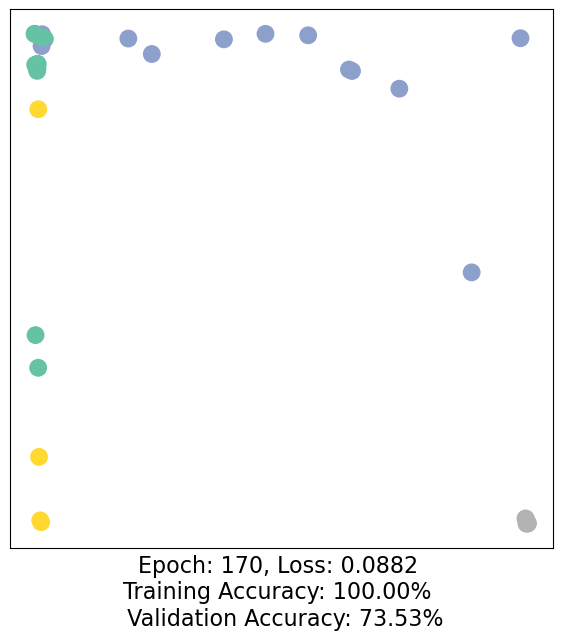

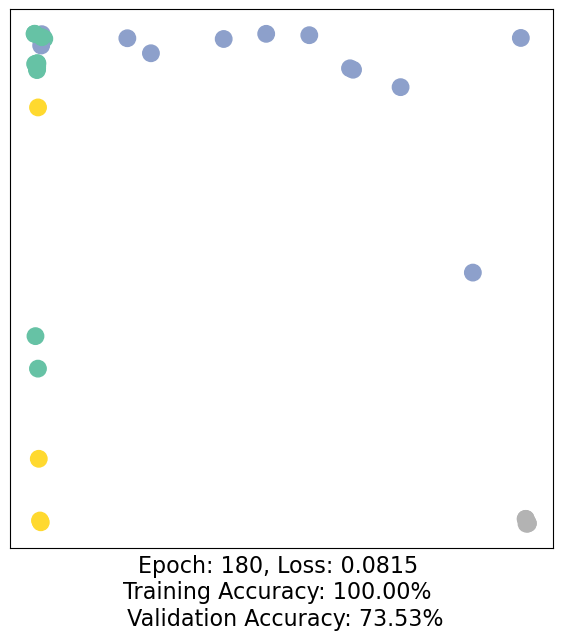

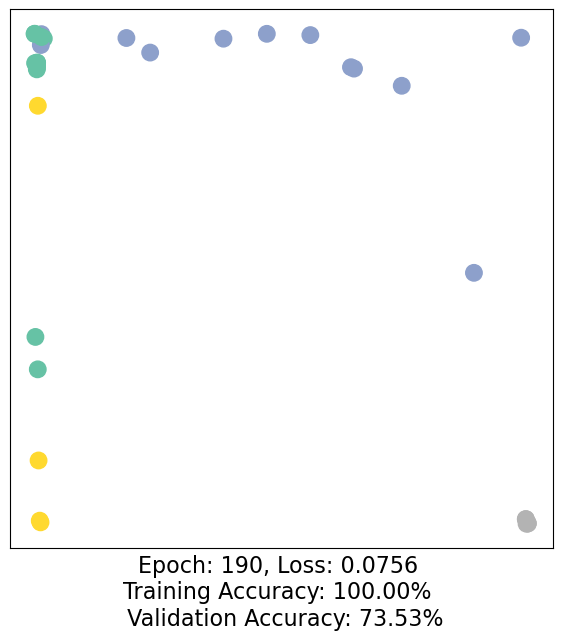

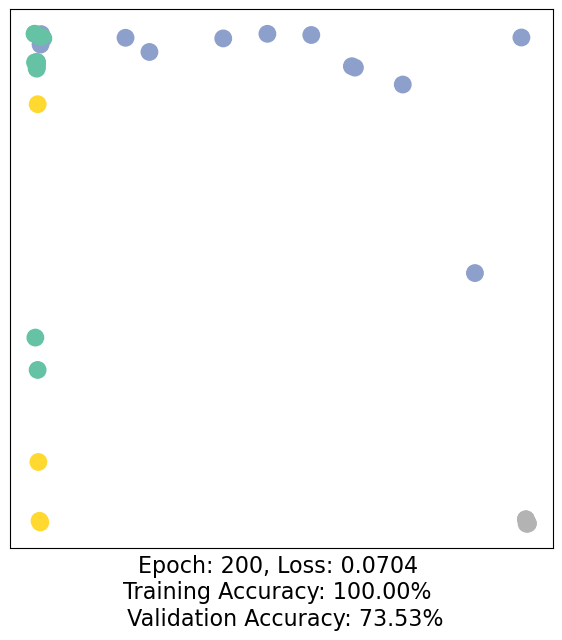

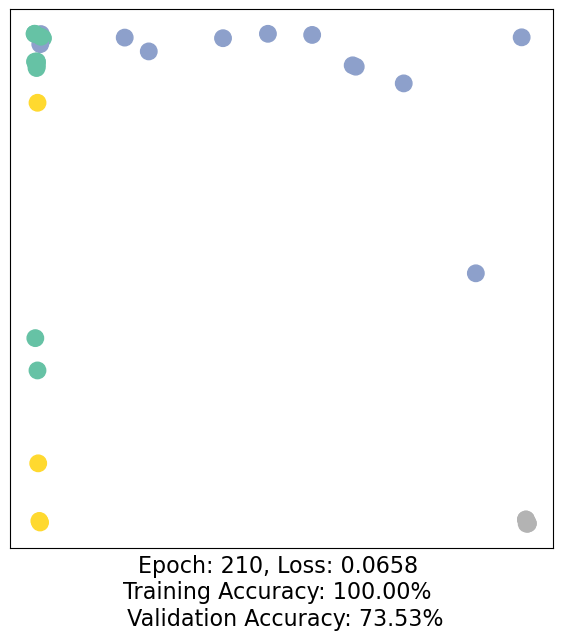

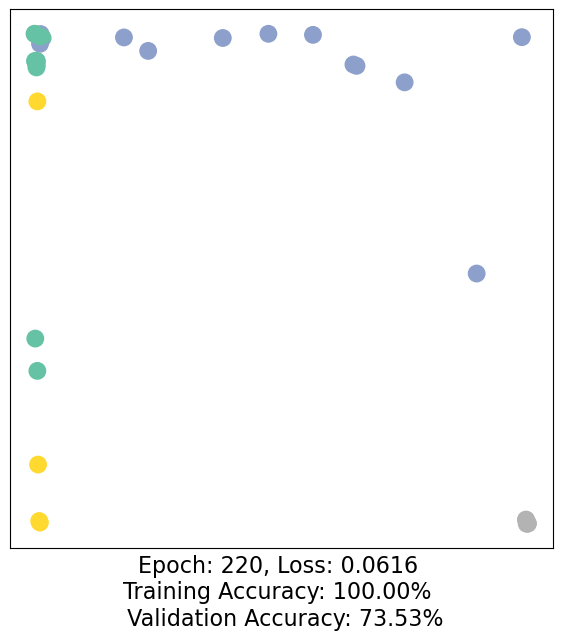

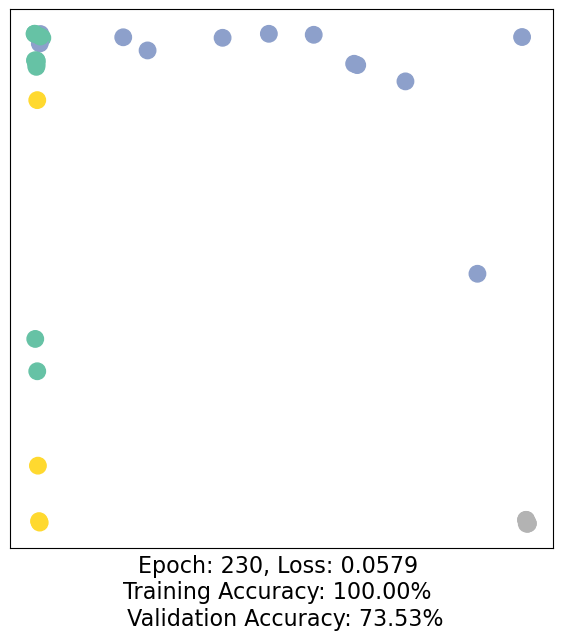

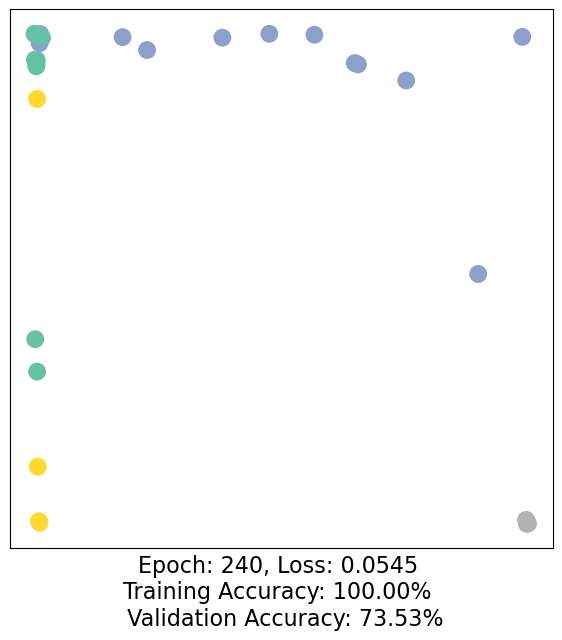

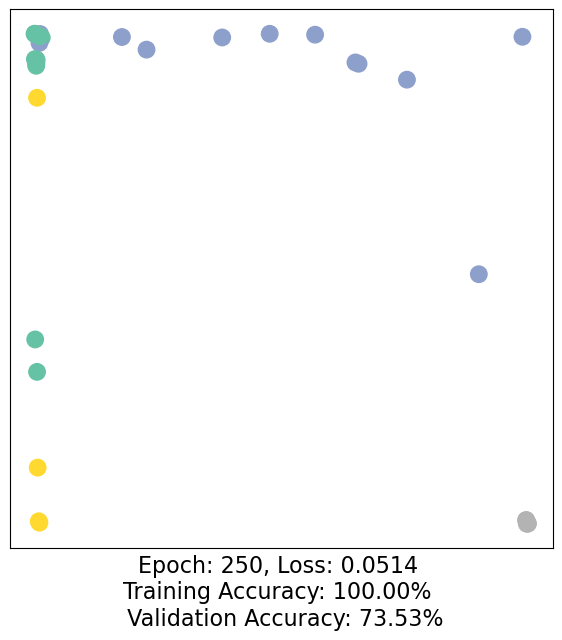

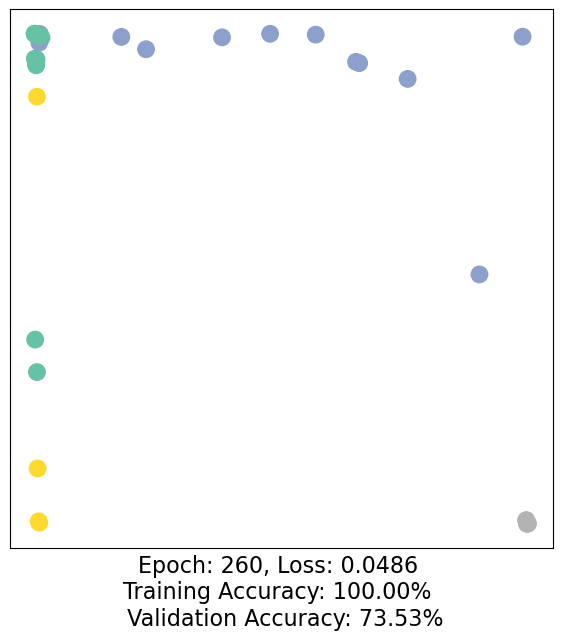

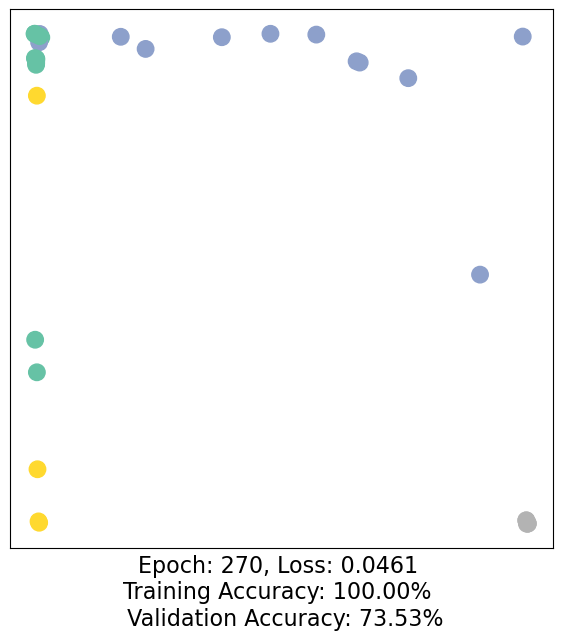

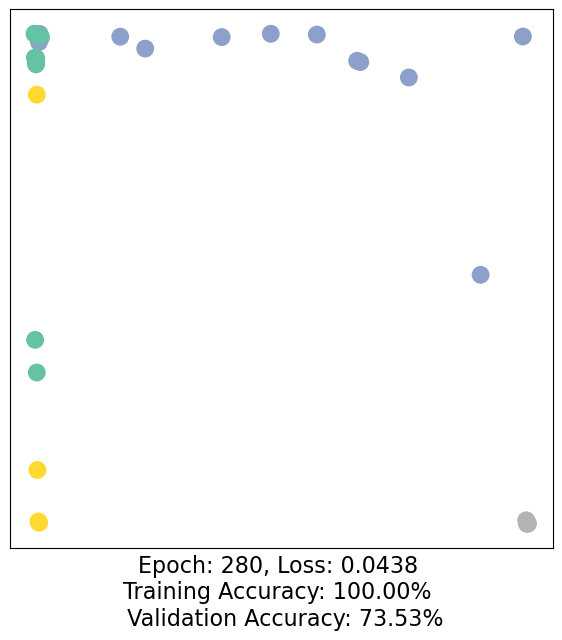

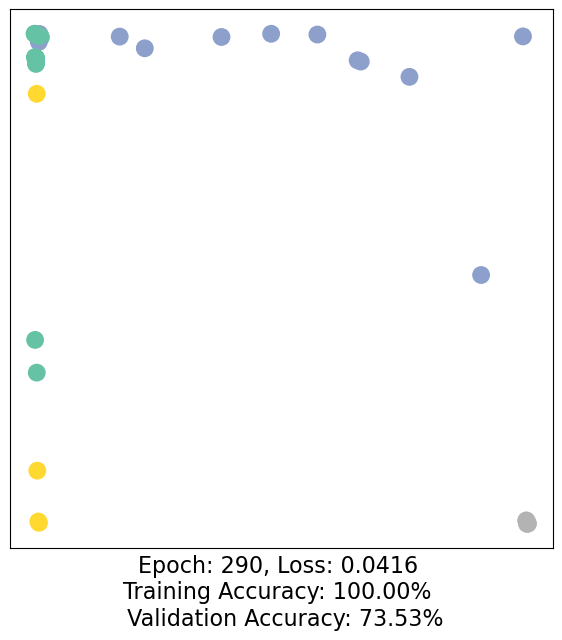

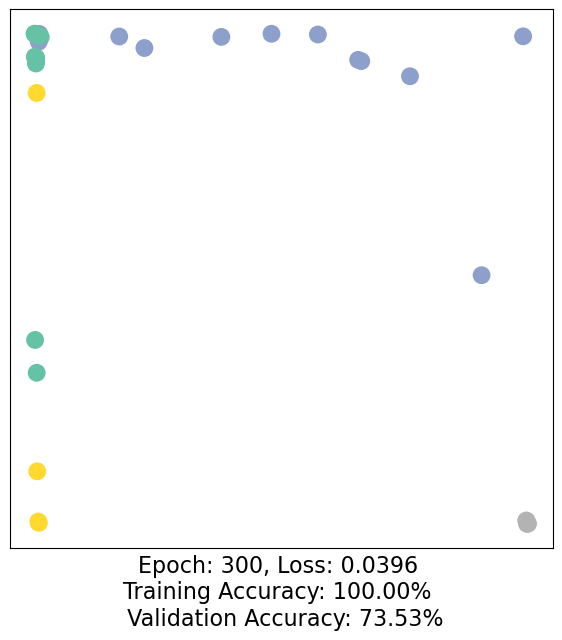

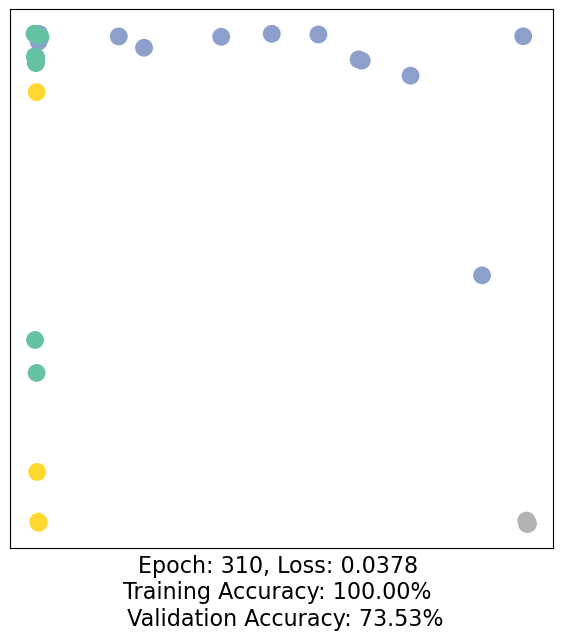

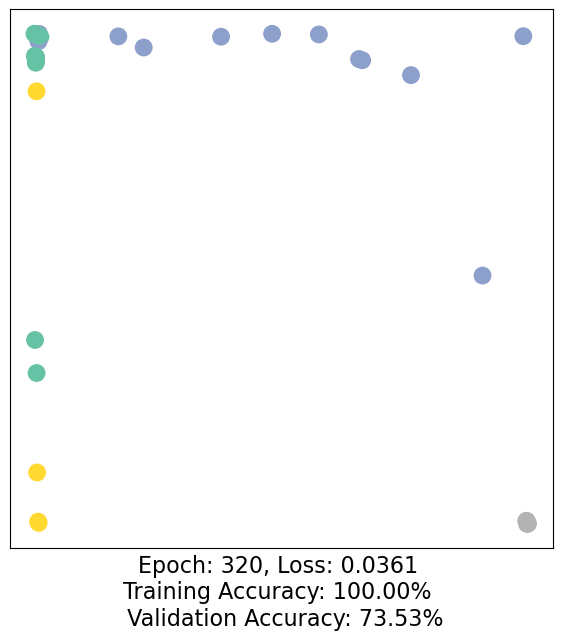

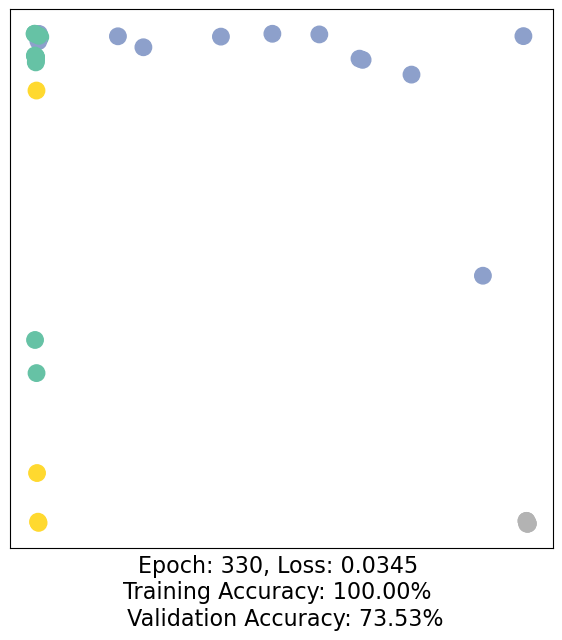

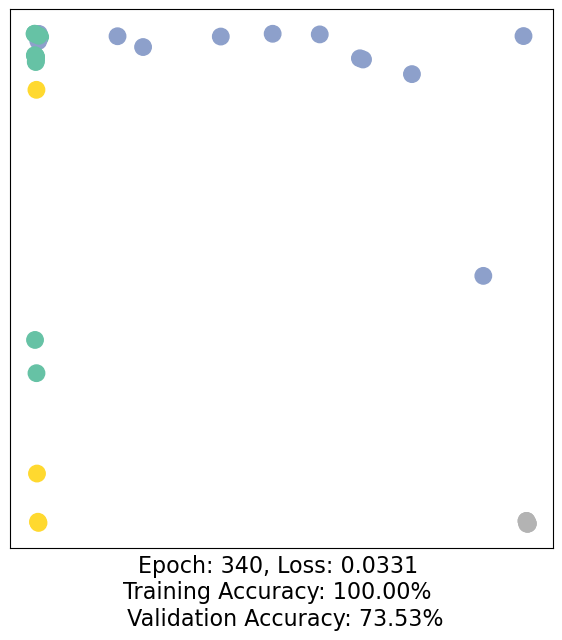

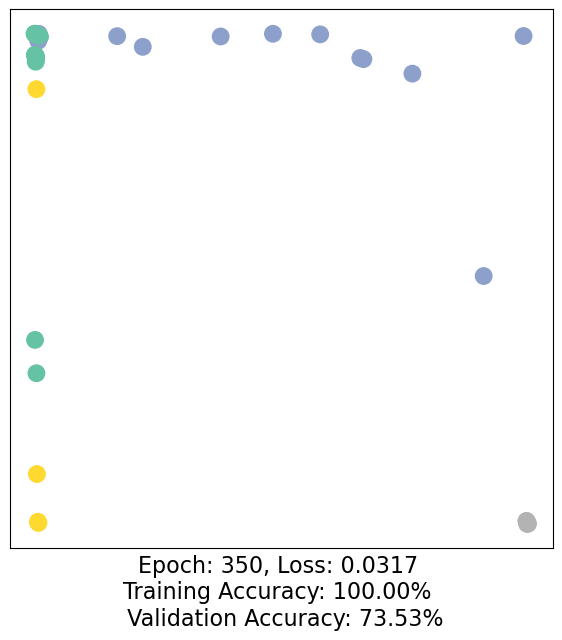

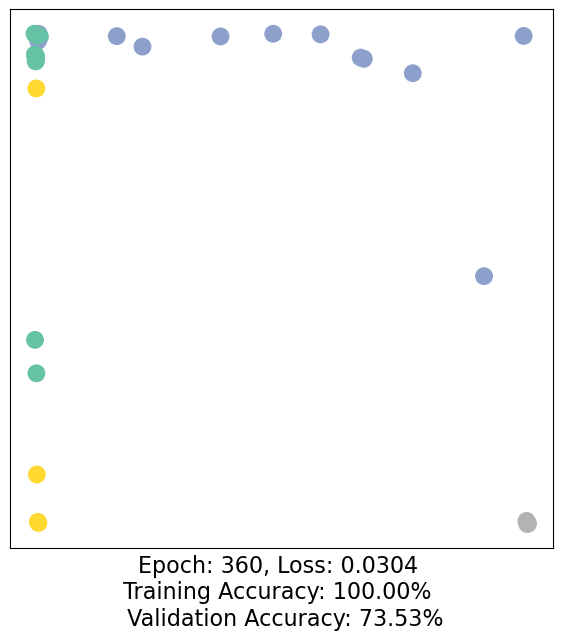

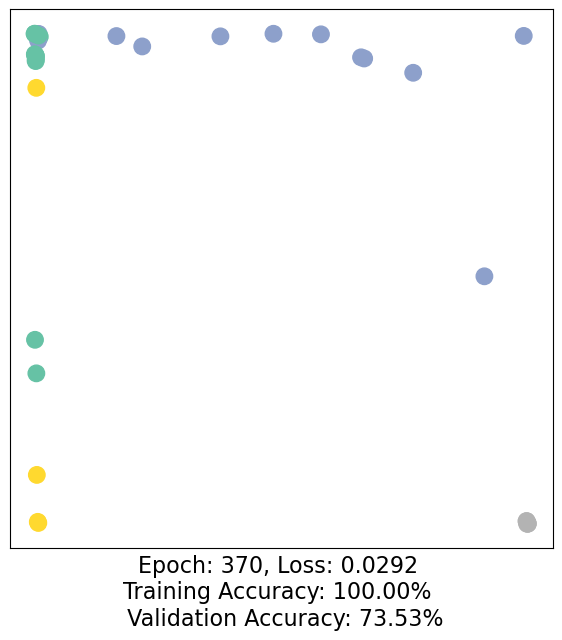

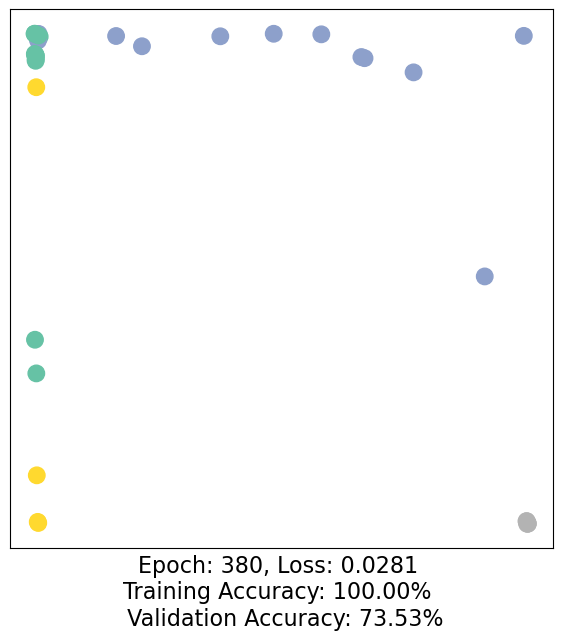

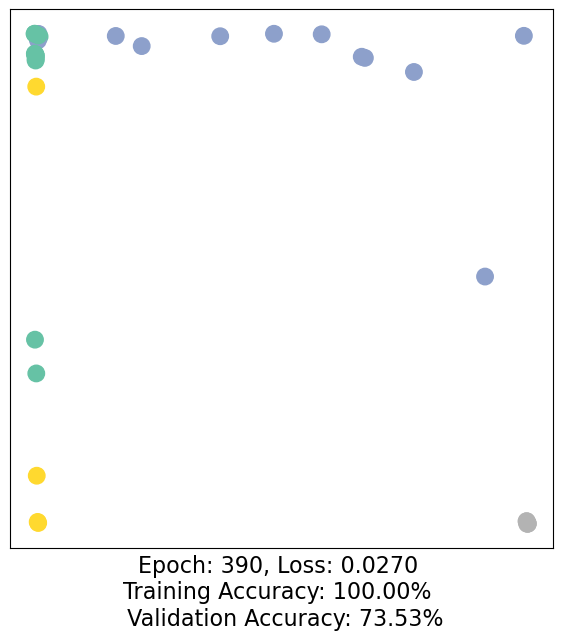

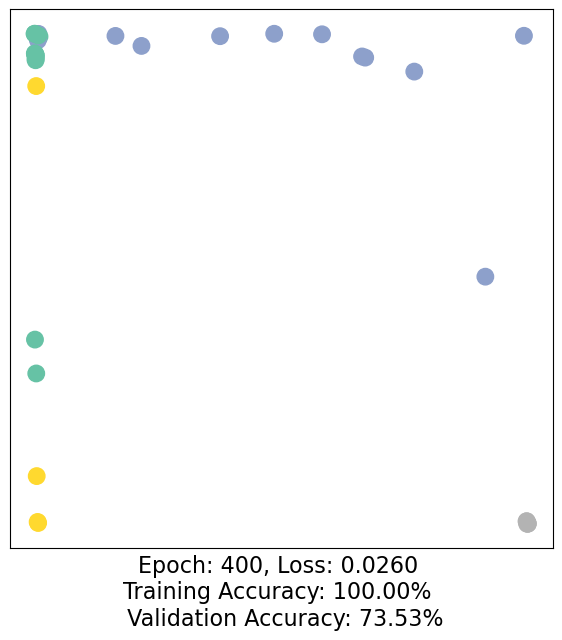

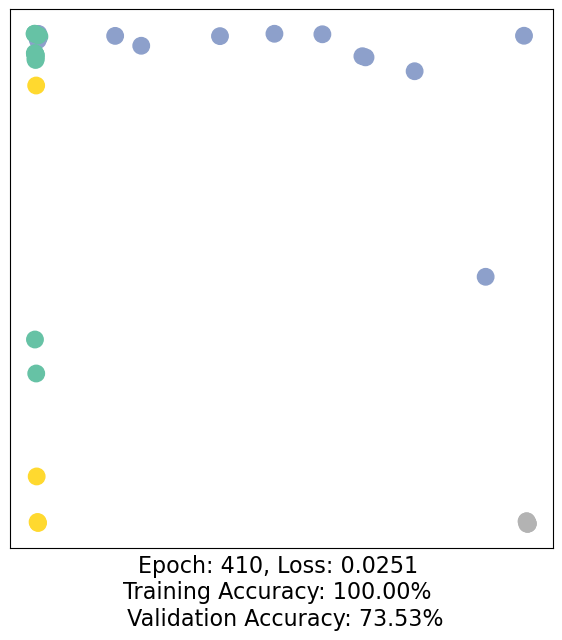

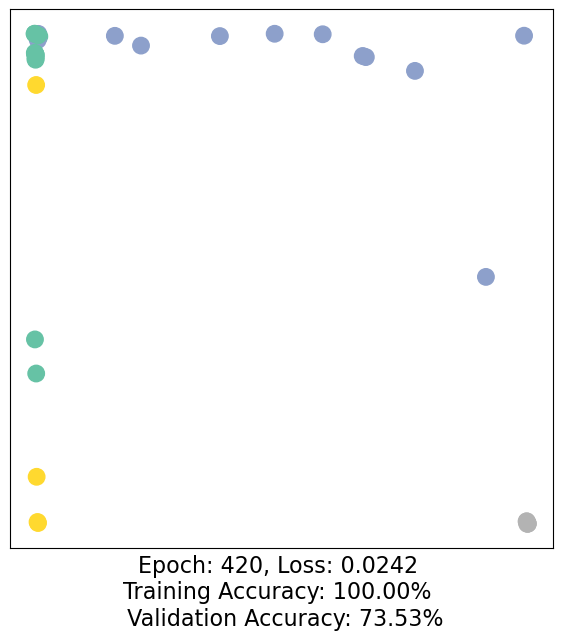

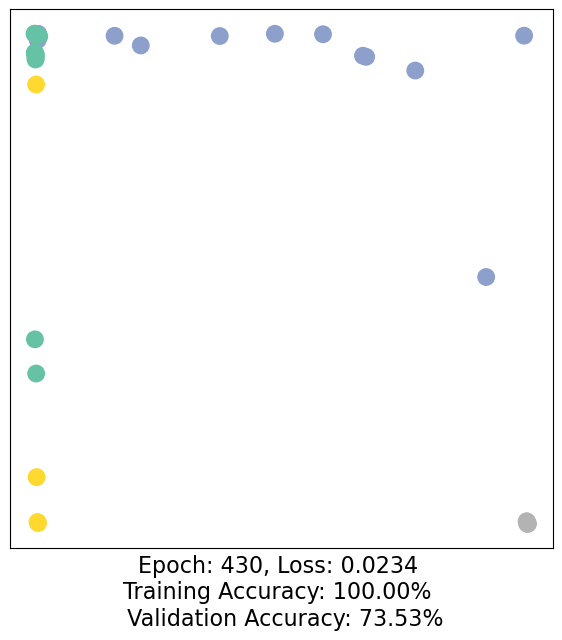

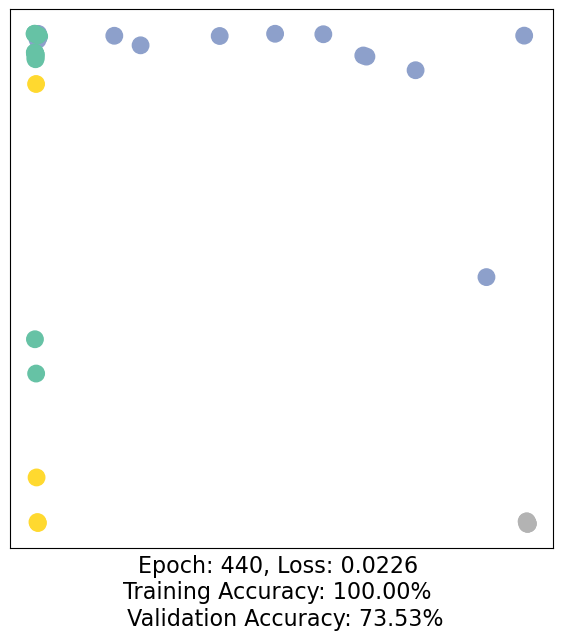

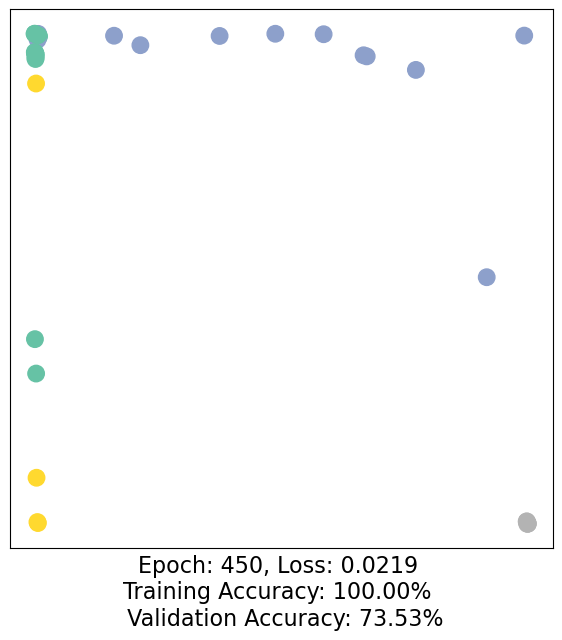

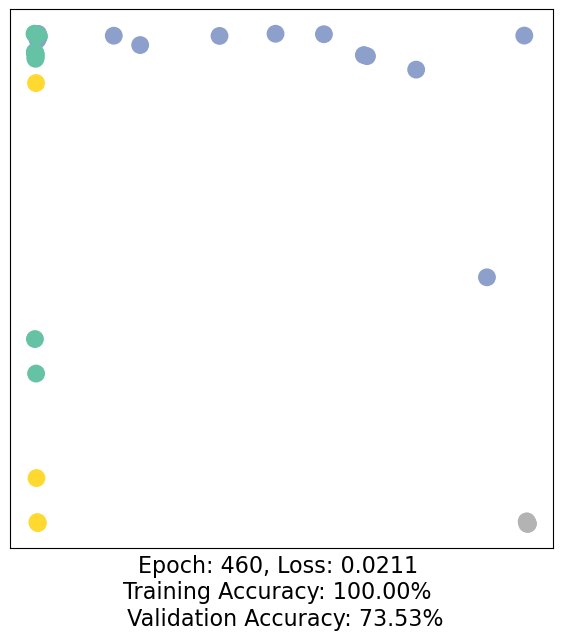

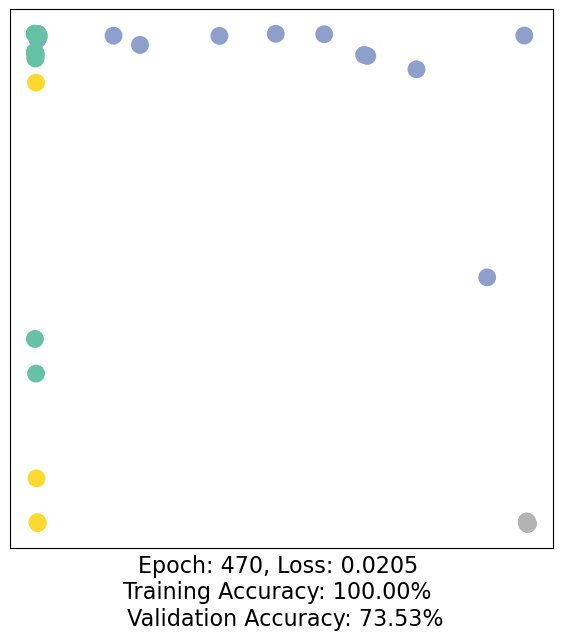

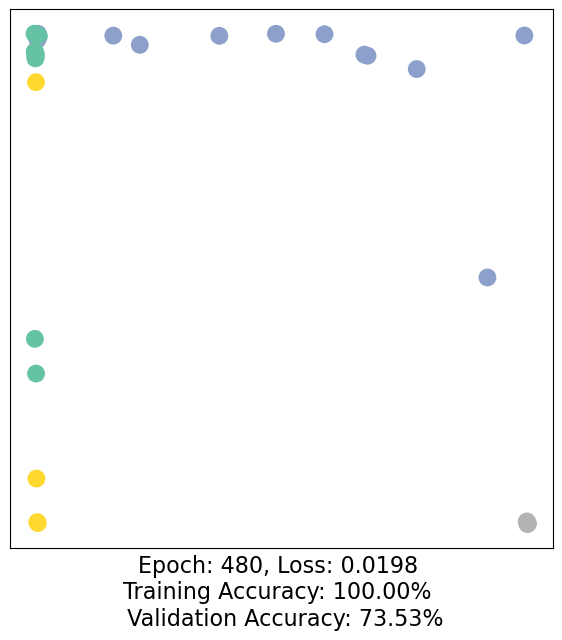

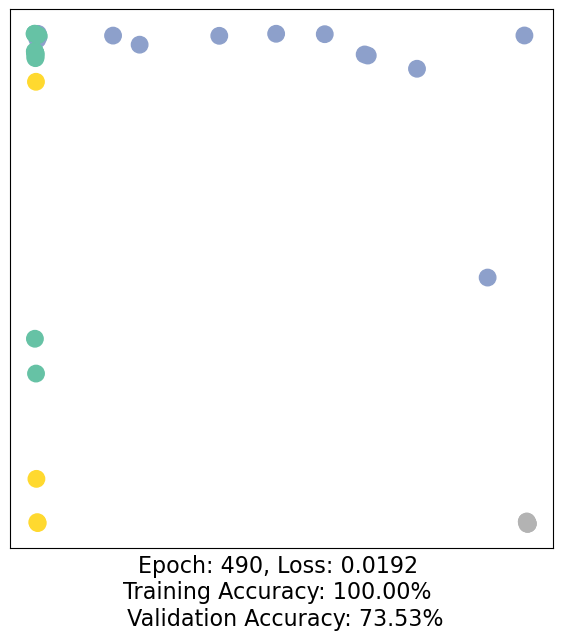

In [50]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())
    
    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

Как видите, наша трехслойная модель GCN довольно хорошо разделяет сообщества и правильно классифицирует большинство узлов.

Кроме того, мы сделали все это с помощью нескольких строк кода благодаря библиотеке PyTorch Geometric, которая помогла нам с обработкой данных и реализацией GNN.